# A.清理和計算實際資料

## 台股資料之Pandas Analysis

In [ ]:
import pandas as pd
import requests


In [ ]:
#從yahoo finace 爬台股資料
link = 'https://finance.yahoo.com/quote/2330.TW/history?period1=1477627200&period2=1635393599&interval=1d&frequency=1d&filter=history'
r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
tw2330 = pd.read_html(r.text)
len(tw2330)


1

In [ ]:
tw2330 = tw2330[0]

tw2330.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 28, 2021",598.00,598.00,591.00,595.00,595.00,16570044
1,"Oct 27, 2021",598.00,599.00,594.00,599.00,599.00,14961858
2,"Oct 26, 2021",595.00,600.00,593.00,599.00,599.00,19998808
3,"Oct 25, 2021",597.00,597.00,590.00,593.00,593.00,16785568
4,"Oct 22, 2021",600.00,602.00,594.00,600.00,600.00,13995403


In [ ]:
tw2330.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Jun 15, 2021",607.00,609.00,606.00,609.00,603.74,26012250
97,"Jun 11, 2021",602.00,603.00,600.00,602.00,596.80,24227710
98,"Jun 10, 2021",591.00,599.00,587.00,599.00,593.82,28527745
99,"Jun 09, 2021",586.00,588.00,583.00,586.00,580.93,20023490
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [ ]:
#刪除資料分析不需要的最後一列'*Close price adjusted for splits.*'
tw2330.drop(100, inplace= True)

In [ ]:
#確認欄位的資料型態
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Open         100 non-null    object
 2   High         100 non-null    object
 3   Low          100 non-null    object
 4   Close*       100 non-null    object
 5   Adj Close**  100 non-null    object
 6   Volume       100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [ ]:
from datetime import datetime

#將日期欄位從object改成時間型態
#datetime.strptime:將文字的日期('Jun 11, 2021'),轉為datetime型態
#datetime無法直接處理Series，所以要用map的方式套
tw2330_new = tw2330.copy()
tw2330_new['Date'] = tw2330_new['Date'].map(lambda x: datetime.strptime(x, '%b %d, %Y'))

tw2330_new['Date'].head()

0   2021-10-28
1   2021-10-27
2   2021-10-26
3   2021-10-25
4   2021-10-22
Name: Date, dtype: datetime64[ns]

In [ ]:
#金額和次數欄位的型態，從object改成數字
for s in tw2330_new.columns:
  if s != 'Date':
    tw2330_new[s] = pd.to_numeric(tw2330_new[s], errors='coerce')

tw2330_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Open         98 non-null     float64       
 2   High         98 non-null     float64       
 3   Low          98 non-null     float64       
 4   Close*       98 non-null     float64       
 5   Adj Close**  98 non-null     float64       
 6   Volume       97 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.2 KB


In [ ]:
#找出無法被轉為數字的資料
tw2330_new[tw2330_new.isnull().T.any()]

,Date,Open,High,Low,Close*,Adj Close**,Volume
28,2021-09-16,NaN,NaN,NaN,NaN,NaN,NaN
50,2021-08-17,584.0,584.0,584.0,584.0,581.35,NaN
94,2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#比對原始的爬蟲結果
tw2330[tw2330_new.isnull().T.any()]

,Date,Open,High,Low,Close*,Adj Close**,Volume
28,"Sep 16, 2021",2.75 Dividend,2.75 Dividend,2.75 Dividend,2.75 Dividend,2.75 Dividend,2.75 Dividend
50,"Aug 17, 2021",584.00,584.00,584.00,584.00,581.35,-
94,"Jun 17, 2021",2.5 Dividend,2.5 Dividend,2.5 Dividend,2.5 Dividend,2.5 Dividend,2.5 Dividend


In [ ]:
#查詢新聞而知9/16、6/17是台積電除息日,將這兩天的資料移除
tw2330_new.dropna(thresh = 5, inplace= True)

#交易量的空值，用平均值補上
tw2330_new['Volume'].fillna(value = tw2330_new['Volume'].mean(), inplace = True)

#將資料依日期當作索引，並重新排序
tw2330_new = tw2330_new.set_index('Date').sort_index(axis = 0)


In [ ]:
tw2330_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-06-09 to 2021-10-28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         98 non-null     float64
 1   High         98 non-null     float64
 2   Low          98 non-null     float64
 3   Close*       98 non-null     float64
 4   Adj Close**  98 non-null     float64
 5   Volume       98 non-null     float64
dtypes: float64(6)
memory usage: 5.4 KB


In [ ]:
tw2330_new.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-06-09,586.0,588.0,583.0,586.0,580.93,20023490.0
2021-06-10,591.0,599.0,587.0,599.0,593.82,28527745.0
2021-06-11,602.0,603.0,600.0,602.0,596.80,24227710.0
2021-06-15,607.0,609.0,606.0,609.0,603.74,26012250.0
2021-06-16,608.0,608.0,605.0,605.0,599.77,25856919.0


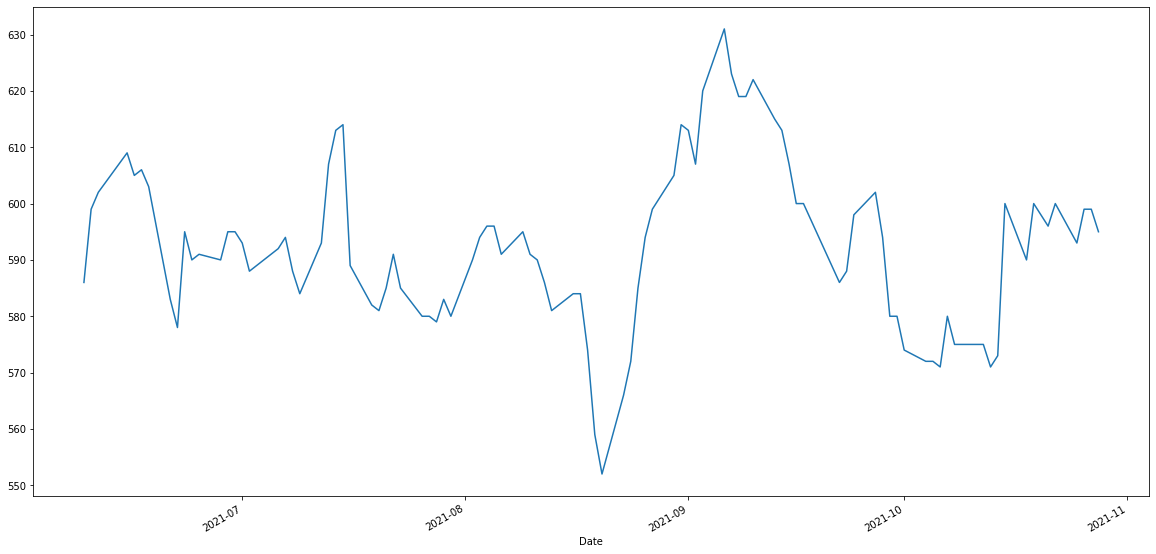

In [ ]:
#2021-6-9起台積電收盤價折線圖
tw2330_new['Close*'].plot(kind = 'line', figsize = [20,10] )

In [ ]:
#計算<投資策略一>：在第一天持有，直到最近一天(投報率約1.01)
#cumprod()計算累積乘積
(tw2330_new['Close*'].pct_change()+1).cumprod()

Date
2021-06-09         NaN
2021-06-10    1.022184
2021-06-11    1.027304
2021-06-15    1.039249
2021-06-16    1.032423
                ...   
2021-10-22    1.023891
2021-10-25    1.011945
2021-10-26    1.022184
2021-10-27    1.022184
2021-10-28    1.015358
Name: Close*, Length: 98, dtype: float64

In [ ]:
#計算<投資策略二>：在每次收盤價高於均線時買進股票，直到最近高於均線的後一天
#計算均線
tw2330_new['sma20'] = tw2330_new['Close*'].rolling(window = 20).mean()

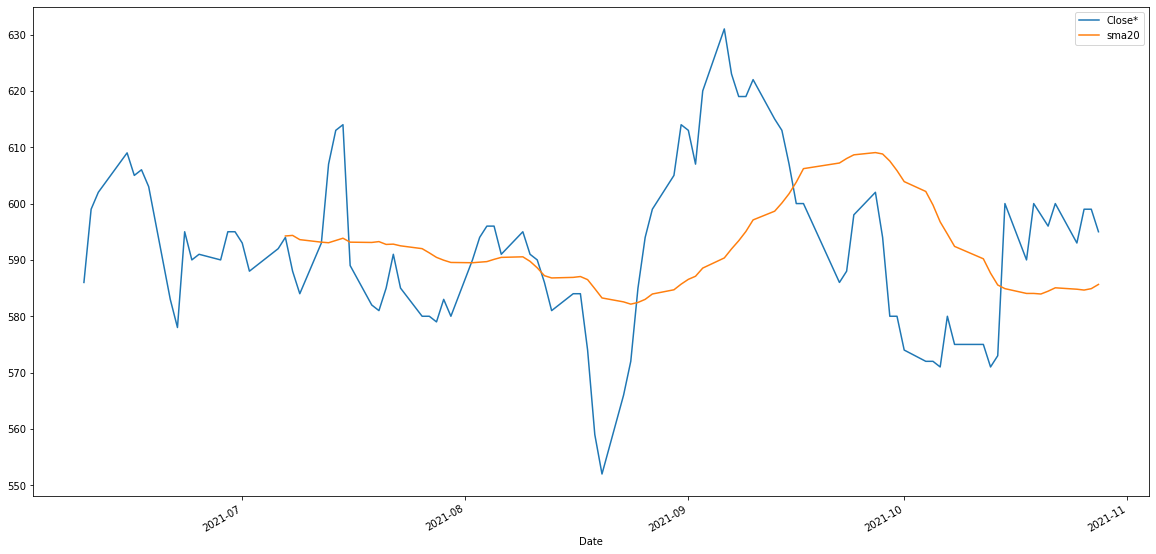

In [ ]:
#對比收盤價和20天均線
tw2330_new[['Close*','sma20']].plot(kind = 'line', figsize = [20,10])

In [ ]:
#計算當天比昨天的投報率
tw2330_new['change'] = tw2330_new['Close*'].pct_change()

#可見<投資策略二>投報率約 0.98
(tw2330_new['change'][(tw2330_new['Close*']>tw2330_new['sma20']).shift(1).fillna(False)]+1).cumprod()

#小結：投資策略一(投報率約1.01)，優於投資策略二(投報率約0.98)

Date
2021-07-14    1.009885
2021-07-15    1.011532
2021-07-16    0.970346
2021-08-03    0.976925
2021-08-04    0.980214
2021-08-05    0.980214
2021-08-06    0.971991
2021-08-09    0.978569
2021-08-10    0.971991
2021-08-11    0.970346
2021-08-12    0.963767
2021-08-26    0.978595
2021-08-27    0.986832
2021-08-30    0.996717
2021-08-31    1.011544
2021-09-01    1.009896
2021-09-02    1.000012
2021-09-03    1.021429
2021-09-06    1.039551
2021-09-07    1.026371
2021-09-08    1.019781
2021-09-09    1.019781
2021-09-10    1.024724
2021-09-13    1.013191
2021-09-14    1.009896
2021-09-15    1.000012
2021-09-16    0.988479
2021-10-18    0.972005
2021-10-19    0.988479
2021-10-20    0.985184
2021-10-21    0.981889
2021-10-22    0.988479
2021-10-25    0.976947
2021-10-26    0.986832
2021-10-27    0.986832
2021-10-28    0.980242
Name: change, dtype: float64

## 顧客資料之初步計算、分析
現有一資料集 Churn_Modelling.csv (https://github.com/ywchiu/esunpy/blob/master/data/Churn_Modelling.csv) ，描述客戶的基本資料與客戶是否流失(Churn) 等基本資訊，

1. 請使用pandas.read_csv讀入該資料集?
2. 計算平均預估薪資(EstimatedSalary)？
3. 根據各性別(Gender)計算平均預估薪資(EstimatedSalary)？
4. 請將 Geography 建立成 dummy variable
5. 對資料集做樞紐分析

附註

! wget https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv

In [ ]:
import pandas as pd
#檔案要從github的 raw 模式存取
url = 'https://raw.githubusercontent.com/ywchiu/esunpy/master/data/Churn_Modelling.csv'
df_churn = pd.read_csv(url)

In [ ]:
# 欄位 Tenurex 代表年資 # 欄位 NumOfProducts 代表產品的購買量
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_churn['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
#SQL : SELECT AVG(EstimatedSalary) FROM df_churn GROUP BY Gender
df_churn.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100601.541382
Male       99664.576931
Name: EstimatedSalary, dtype: float64

In [ ]:
#建立顧客居住地 dummy variable 
#供未來做機器學習使用(條件:結構化、無缺失值、都是數值型的資料)
geo = pd.get_dummies(df_churn['Geography'])
result = pd.concat([geo, df_churn], axis = 1)
result.head(3)

,France,Germany,Spain,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


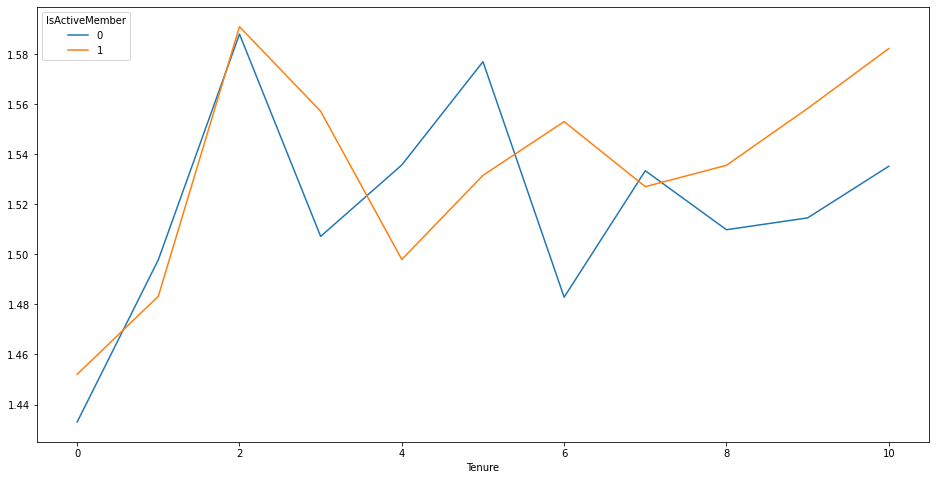

In [ ]:
#樞紐分析:不同年資的顧客中，活躍者對比不活躍者的平均產品購買量 
num_mean = df_churn.pivot_table(index= 'Tenure', columns = 'IsActiveMember', values = 'NumOfProducts', aggfunc= 'mean')
num_mean.plot(kind = 'line', figsize = [16,8])
#可見同一年加入的顧客，無論是否活躍，平均購買量相差不大(在0.5件以下)
#2年以內加入的顧客，平均購買量較高，可再分析

In [ ]:
#延伸分析:
#統計不同年資顧客群的人數 
df_churn['Tenure'].value_counts().sort_index()
#可知於近幾年，每年加入的顧客人數沒有太多變化

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

In [ ]:
#計算不同年資的顧客群，平均每個人一年的購買量

nn = df_churn.groupby('Tenure')['NumOfProducts'].sum() #不同年資顧客群的合計購買量
num_all = {}

for x ,y in zip(range(len(nn)), df_churn['Tenure'].value_counts().sort_index()):
  if x == 0:
    print(x , nn[x]/y)
  else:
    print(x , nn[x]/x/y)

#可見顧客的平均購買力，10年以來逐步增加
#很可能是公司的行銷策略越來越精準，逐漸鎖定了目標TA

0 1.4430992736077481
1 1.489855072463768
2 0.7948473282442748
3 0.5110670630987776
4 0.37917087967644086
5 0.31086956521739134
6 0.25318855567045845
7 0.21859366314619233
8 0.1903658536585366
9 0.17061878952122855
10 0.15591836734693879


# B.資料清理之模組&功能練習筆記

## Pandas Series
來自於R語言

*可以容納不同型態的資料

*可依據欄位和索引做存取(結構化資料)

In [ ]:
import pandas as pd
df = pd.DataFrame([['Frank','M',29],['Marry','F',23],['john','M',35],['Ted','M',33],['Jean','M',21],['Lisa','F',20]])
df

In [ ]:
#表格schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6 non-null      object
 1   1       6 non-null      object
 2   2       6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [ ]:
#敘述性統計分析
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [ ]:
#SQL: SELECT name FROM df;
df['name']

0    Frank
1    Marry
2     john
3      Ted
4     Jean
5     Lisa
Name: name, dtype: object

In [ ]:
#SQL: SELECT name,age FROM df;
df[['name','age']]

,name,age
0,Frank,29
1,Marry,23
2,john,35
3,Ted,33
4,Jean,21
5,Lisa,20


In [ ]:
#SQL: SELECT * FROM df WHERE gender = 'M';
df[df ['gender'] == 'M']


,age,gender,name
0,29,M,Frank
2,35,M,john
3,33,M,Ted
4,21,M,Jean


In [ ]:
#SQL: SELECT * FROM df WHERE gender = 'M' AND age >30 ;
df[(df['gender'] == 'M') & (df ['age'] > 30)]


,age,gender,name
2,35,M,john
3,33,M,Ted


In [ ]:
df['userid'] = range(101,107)
df = df.set_index('userid')
df

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john
104,33,M,Ted
105,21,M,Jean
106,20,F,Lisa


In [ ]:
df.loc[101:103,'age':'name']

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john


In [ ]:
df.iloc[0:3,0:3]
#loc做slice會包含最後的欄位，但iloc不會(數字需要多加一)

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john


In [ ]:
#替換特定的值
df.mask(df.age > 30, -25)

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,-25,-25,-25
104,-25,-25,-25
105,21,M,Jean
106,20,F,Lisa


In [ ]:
df['employee'] = True
df

,age,gender,name,employee
userid,,,,
101,29,M,Frank,True
102,23,F,Marry,True
103,35,M,john,True
104,33,M,Ted,True
105,21,M,Jean,True
106,20,F,Lisa,True


In [ ]:
del df['employee']
#同 df.drop('employee', axis = 1)
#但del 會直接修改df，而 drop不會(除非加上 inplace = True)
df

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john
104,33,M,Ted
105,21,M,Jean
106,20,F,Lisa


In [ ]:
df.loc[107] = {'age':10, 'name':'qoo'}
df

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john
104,33,M,Ted
105,21,M,Jean
106,20,F,Lisa
107,10,NaN,qoo


In [ ]:
df.drop(107, inplace= True)
df

,age,gender,name
userid,,,
101,29,M,Frank
102,23,F,Marry
103,35,M,john
104,33,M,Ted
105,21,M,Jean
106,20,F,Lisa


In [ ]:
df.sort_values('age')

,age,gender,name
userid,,,
106,20,F,Lisa
105,21,M,Jean
102,23,F,Marry
101,29,M,Frank
104,33,M,Ted
103,35,M,john


### Pratice 3-2
#### 到公開觀測資訊站下載並清理台灣勞工薪資中位數，找出薪資平均數最高和最低的公司

In [ ]:
import requests

In [ ]:
payload = {'encodeURIComponent':	"1", 'step':"1", 'firstin':"1", 'TYPEK':"sii", 'RYEAR': '108', 'code': ''}
res = requests.post('https://mops.twse.com.tw/mops/web/ajax_t100sb14' , data = payload)


In [ ]:
res.text

'\r\n\r\n<html>\r\n<head>\r\n\t<title>公開資訊觀測站</title>\r\n<!--\t<link href="css/css1.css" rel="stylesheet" type="text/css" Media="Screen"/> -->\r\n<!--\t<script type="text/javascript" src="js/mops1.js"></script> -->\r\n</head>\r\n\r\n<body>\r\n<form action=\'/mops/web/ajax_t100sb14\' method=\'post\' onsubmit=\'return false;\' name=\'fm\'>\n<input type=\'hidden\' name=\'firstin\' value=\'true\'>\n<input type=\'hidden\' name=\'step\' value=\'10\'>\n<input type=\'hidden\' name=\'filename\' value=\'t100sb14_20211104_073634754.csv\'>\n<button style=\'background-color:transparent;border:0;cursor:pointer;text-decoration:underline;\' onclick="action=\'/server-java/t105sb02\';submit();"><img src=\'images/bu_03.gif\' hspace=\'3\' ></button>\n</form>\n<form action=\'/mops/web/ajax_t100sb14\' method=\'post\'>\n<input type=\'hidden\' name=\'firstin\' value=\'true\'>\n<input type=\'hidden\' name=\'step\' value=\'1\'>\n<input type=\'hidden\' name=\'code\' value=\'\'>\n<input type=\'hidden\' name=\'TYP

In [ ]:
#dfs是list型態
dfs = pd.read_html(res.text)
len(dfs)

2

In [ ]:
print(dfs[0][0:5]) #第0份資料是表單
print('==============================')
print(dfs[1][0:5]) #第1份資料是資料來源說明

   產業類別  公司代號 公司名稱  ...               同產業公司                                        
   產業類別  公司代號 公司名稱  ...      平均員工薪資費用(仟元/人)         平均每股盈餘(元/股) Unnamed: 15_level_1
   產業類別  公司代號 公司名稱  ... Unnamed: 13_level_2 Unnamed: 14_level_2 Unnamed: 15_level_2
0  水泥工業  1101   台泥  ...                 977                4.02                 NaN
1  水泥工業  1102   亞泥  ...                 977                4.02                 NaN
2  水泥工業  1103   嘉泥  ...                 977                4.02                 NaN
3  水泥工業  1104   環泥  ...                 977                4.02                 NaN
4  水泥工業  1108   幸福  ...                 977                4.02                 NaN

[5 rows x 16 columns]
     0                                                  1
0   一、                                         資料來源及定義說明：
1  (一)  統計資料係依據各公司（不含KY公司）公告申報之年度財務報告附註揭露資訊。除金融控股公司為合併...
2  (二)  所稱「員工福利費用」包括薪資、勞健保、退休金、其他員工福利費用，經扣除「董事酬金」後之金額。...
3  (三)  所稱「員工薪資費用」通常包括本薪、加班費、獎金、酬勞等經常性及非經常性薪資，亦可能包括依股份...
4  (四)  所稱「員工人數

In [ ]:
dfs[0]

產業類別  公司代號  ...               同產業公司                    
     產業類別  公司代號  ...         平均每股盈餘(元/股) Unnamed: 15_level_1
     產業類別  公司代號  ... Unnamed: 14_level_2 Unnamed: 15_level_2
0    水泥工業  1101  ...                4.02                 NaN
1    水泥工業  1102  ...                4.02                 NaN
2    水泥工業  1103  ...                4.02                 NaN
3    水泥工業  1104  ...                4.02                 NaN
4    水泥工業  1108  ...                4.02                 NaN
..    ...   ...  ...                 ...                 ...
862    其他  9944  ...                3.81                 NaN
863    其他  9945  ...                3.81                 NaN
864  建材營造  9946  ...                1.39                 NaN
865    其他  9955  ...                3.81                 NaN
866  鋼鐵工業  9958  ...                0.56                 NaN

[867 rows x 16 columns]

In [ ]:
#挑出表單中公司和員工薪資資料
df_sal = dfs[0].iloc[:, [0,1,2,6,8]]
df_sal.columns = ['產業類別', '公司代號', '公司名稱','員工人數(人)', '平均員工薪資108年(仟元)']
#因為表單有三層的欄位名，須要重新命名
df_sal.head()

,產業類別,公司代號,公司名稱,員工人數(人),平均員工薪資108年(仟元)
0,水泥工業,1101,台泥,979,1245
1,水泥工業,1102,亞泥,483,1313
2,水泥工業,1103,嘉泥,84,1476
3,水泥工業,1104,環泥,397,782
4,水泥工業,1108,幸福,428,487


In [ ]:
df_sal.sort_values('平均員工薪資108年(仟元)', ascending= False).head(10)

,產業類別,公司代號,公司名稱,員工人數(人),平均員工薪資108年(仟元)
612,化學工業,3708,上緯投控,18,5166
475,貿易百貨,2905,三商,8,4687
405,建材營造,2548,華固,68,3821
191,造紙工業,1907,永豐餘,37,3653
272,其他電子業,2354,鴻準,161,3458
719,電子零組件業,6191,精成科,86,3432
60,其他,1437,勤益控,6,2972
343,半導體業,2454,聯發科,8555,2921
752,其他電子業,6409,旭隼,105,2828
292,半導體業,2379,瑞昱,3678,2814


In [ ]:
df_sal.sort_values('平均員工薪資108年(仟元)', ascending= True).head(10)
#

,產業類別,公司代號,公司名稱,員工人數(人),平均員工薪資108年(仟元)
140,電器電纜,1614,三洋電,1049,327
855,油電燃氣業,9937,全國,2107,340
861,觀光事業,9943,好樂迪,1450,342
10,食品工業,1213,大飲,119,387
327,電子通路業,2430,燦坤,2645,395
24,食品工業,1235,興泰,23,398
631,電機機械,4540,全球傳動,1028,402
435,觀光事業,2722,夏都,537,406
104,電機機械,1517,利奇,594,410
22,食品工業,1233,天仁,1577,411


## Missing Value

In [ ]:
import pandas as pd
import numpy  as np
# nan: Not a Number
df_nan = pd.DataFrame([\
                   ['frank', 'M',    np.nan], \
                   ['mary' , np.nan, np.nan], \
                   ['tom'  , 'M',    35], \
                   ['ted'  , 'M',    33], \
                   ['jean' , np.nan, 21], \
                   ['lisa' , 'F',    20]])
df_nan.columns = ['name', 'gender', 'age']
df_nan

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [ ]:
df_nan['gender'].isna()
#同.isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [ ]:
df_nan['gender'].notna()


0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [ ]:
#Boolean可以加總
df_nan.isna().sum()

name      0
gender    2
age       2
dtype: int64

In [ ]:
#找出表單中所有nan
#先找出每一列對nan的boolean(為mask)，再套表單
df_nan[df_nan.isna().T.any()]

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
4,jean,NaN,21.0


In [ ]:
#刪除有含nan的資料
df_nan.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [ ]:
#刪除整列都是nan的資料
df_nan.dropna(how= 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [ ]:
#刪除有2項nan以上的資料
df_nan.dropna(thresh= 2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [ ]:
df_nan['emploee'] = np.nan

In [ ]:
#刪除整行都是nan的欄位
df_nan.dropna(axis=1, how = 'all')

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [ ]:
df_nan.fillna(0) #實際填入要加inplace = True


,name,gender,age,emploee
0,frank,M,0.0,0.0
1,mary,0,0.0,0.0
2,tom,M,35.0,0.0
3,ted,M,33.0,0.0
4,jean,0,21.0,0.0
5,lisa,F,20.0,0.0


In [ ]:
#以性別為分類，計算各性別的年齡平均數
df_nan.groupby('gender')['age'].mean()
#以欄位的平均值，代替原本數值填入資料
#但因為依性別為分類，需要該資料的性別非空值
df_nan.groupby('gender')['age'].transform('mean')

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [ ]:
#在空值填上性別的平均年齡
df_nan['age'].fillna(df_nan.groupby('gender')['age'].transform('mean'))

0    34.0
1     NaN
2    35.0
3    33.0
4    21.0
5    20.0
Name: age, dtype: float64

In [ ]:
df_nan.loc[0, 'emploee']= '01'
df_nan.loc[3, 'emploee']= '04'
#用有數值的欄位的值，往其下面的空值，填入1格
df_nan['emploee'].fillna(method = 'pad', limit = 1)

0     01
1     01
2    NaN
3     04
4     04
5    NaN
Name: emploee, dtype: object

In [ ]:
#用有數值的欄位的值，往其上面的空值，填入2格
df_nan['emploee'].fillna(method = 'bfill', limit = 2)

0     01
1     04
2     04
3     04
4    NaN
5    NaN
Name: emploee, dtype: object

In [ ]:
df2 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [np.nan, np.nan],\
                    [4, 950],\
                    [5,1080],\
                    [6,1200]])
df2.columns = ['time', 'val']



In [ ]:
#在條件判斷中分辨nan時，當數值為float無法套用.isna()
#改用pd.isna()
for y in df2['time']:
  if pd.isna(y):
    print(1)
  else:
    print(0)


0
0
1
0
0
0


In [ ]:
#針對連續型資料，適合用前後2筆資料的平均值填入空值
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


##Data Transform

In [ ]:
import pandas as pd
df_591 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)
df_591.head(3)


,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385


In [ ]:
import numpy as np
np.sqrt(df_591['area'])

0     6.841053
1     8.769265
2     8.443933
3     4.242641
4     5.291503
        ...   
25    7.622336
26    6.356099
27    4.415880
28    5.263079
29    4.888763
Name: area, Length: 720, dtype: float64

In [ ]:
#坪數轉換平方公尺 #在df進行向量化計算
df_591['square_feet'] = df_591['area']/0.3025


In [ ]:
#建一函數:將字串型態轉為整數
def NormalizePrice(ele):
  return int(ele.replace(',',''))

In [ ]:
#用map在Series的每一個值上套函數
df_591['price'].map(NormalizePrice)
#相同 df_591['price'].map(lambda ele : int(ele.replace(',','')))


0      60000
1     100000
2     150000
3      29000
4      31800
       ...  
25     55000
26     50000
27     30000
28     48000
29     43000
Name: price, Length: 720, dtype: int64

In [ ]:
df_123 = pd.DataFrame([
   [60,70,50],
   [80,79,68],
   [63,66,82]], 
  columns = ['First', 'Second', 'Third'])
df_123

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [ ]:
#用apply在df每一列/行上套函數
df_123.apply(lambda e: e.max()- e.min() ,axis=1)

0    20
1    12
2    19
dtype: int64

In [ ]:
#用applymap在df每一個值上套函數
df2.applymap(lambda e:'-' if pd.isnull(e) else e)

,time,val
0,1,870
1,2,900
2,-,-
3,4,950
4,5,1080
5,6,1200


### Pratice 3-3
請協助整理我們清理以下商品資料products，並使用 pandas 的 map 函數將 price 欄位資料從字串轉換成整數格式，但是如果商品的資料價格是空的，請幫我填上平均值

````
data = [
{'name': 'HP 14s-cf3037TU 14吋輕薄窄邊筆電(極地白) (i5-1035 G1/8GB/512GB PCIe SSD/W10/FHD/14)', 'price': '$18,888'},
{'name': 'HP Pavilion 14-ce3042TX 輕薄筆電(冰瓷金) (i5-1035 G1/8G/MX250-2G/1T+256G PCIe/W10/FHD/14)'},
{'name': 'HP 15s-du1020TX (i5-10210U/8GB/MX130-2GB/512GB PCIe/W10/FHD/15.6)', 'price': '$18,999'},
{'name': 'HP Pavilion Gaming 15-dk1121TX 黑騎士(i5-10300H/8G/RTX2060-6G/512G PCIe SSD/W10/FHD/15.6)', 'price': '$27,888'},
{'name': 'HP 14s-dq2038TU 極地白(i5-1135 G7/8GB/512GB PCIe SSD/W10/FHD/14)', 'price': '$21,900'}    
]
````

In [ ]:
df_ele = pd.DataFrame([
{'name': 'HP 14s-cf3037TU 14吋輕薄窄邊筆電(極地白) (i5-1035 G1/8GB/512GB PCIe SSD/W10/FHD/14)', 'price': '$18,888'},
{'name': 'HP Pavilion 14-ce3042TX 輕薄筆電(冰瓷金) (i5-1035 G1/8G/MX250-2G/1T+256G PCIe/W10/FHD/14)'},
{'name': 'HP 15s-du1020TX (i5-10210U/8GB/MX130-2GB/512GB PCIe/W10/FHD/15.6)', 'price': '$18,999'},
{'name': 'HP Pavilion Gaming 15-dk1121TX 黑騎士(i5-10300H/8G/RTX2060-6G/512G PCIe SSD/W10/FHD/15.6)', 'price': '$27,888'},
{'name': 'HP 14s-dq2038TU 極地白(i5-1135 G7/8GB/512GB PCIe SSD/W10/FHD/14)', 'price': '$21,900'}    
])
df_ele

,name,price
0,HP 14s-cf3037TU 14吋輕薄窄邊筆電(極地白) (i5-1035 G1/8GB...,"$18,888"
1,HP Pavilion 14-ce3042TX 輕薄筆電(冰瓷金) (i5-1035 G1/...,NaN
2,HP 15s-du1020TX (i5-10210U/8GB/MX130-2GB/512GB...,"$18,999"
3,HP Pavilion Gaming 15-dk1121TX 黑騎士(i5-10300H/8...,"$27,888"
4,HP 14s-dq2038TU 極地白(i5-1135 G7/8GB/512GB PCIe ...,"$21,900"


In [ ]:
df_ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   price   4 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [ ]:
def int_price(pp):
  if pd.isna(pp):
    return pp
  else:
    return int(pp.replace('$','').replace(',',''))

df_ele['price'].map(int_price)

0    18888.0
1        NaN
2    18999.0
3    27888.0
4    21900.0
Name: price, dtype: float64

In [ ]:
#lamda中有if條件句，就也要寫else
df_ele['price'] = df_ele['price'].map(lambda x : int(x.replace('$','').replace(',','')) if pd.notnull(x) else x)

In [ ]:
df_ele['price'] = df_ele['price'].fillna(df_ele['price'].mean())
df_ele['price']

0    18888.00
1    21918.75
2    18999.00
3    27888.00
4    21900.00
Name: price, dtype: float64

### Time data

In [ ]:
from datetime import date , datetime
#date處理日期 #dateime 處理時間


datetime.now()

datetime.datetime(2021, 11, 3, 23, 36, 40, 414025)

In [ ]:
date.today()

datetime.date(2021, 11, 3)

In [ ]:
#strftime將 datetime轉為 string
curreny_time = datetime.now()
curreny_time.strftime('%Y-%m-%d')

'2021-11-03'

In [ ]:
#strptime將string轉為  datetime
sdt = datetime.strptime('2021-05-14','%Y-%m-%d')
sdt

datetime.datetime(2021, 5, 14, 0, 0)

In [ ]:
curreny_time-sdt

datetime.timedelta(days=173, seconds=85000, microseconds=444418)

In [ ]:
from datetime import timedelta
#用timedelta做時間的運算
curreny_time- timedelta(days=1)

datetime.datetime(2021, 11, 2, 23, 36, 40, 444418)

In [ ]:
import time
#將dtetime型態改為 unix timestamp
time.mktime(curreny_time.timetuple())
#計算1970-1-1至今的秒數

1635982600.0

In [ ]:
#將unix timestamp型態改為 datetime
datetime.fromtimestamp(1635750759.0)

datetime.datetime(2021, 11, 1, 7, 12, 39)

In [ ]:
import requests
res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/5')
data = res.json()['data'].values()

In [ ]:
df_apple = pd.DataFrame(data)
df_apple.head(3)

,no,title,bigphoto_flag,photo_S,photo_L,url,time,type_en,group,type_cn,local,summary,video,width,height,localUrl,tagUrl,style,tagText
0,3725429,吃鍋魔人看過來！全家超商導入70款特色湯底 首創「火鍋地圖」,0,https://img.ltn.com.tw/Upload/ent/page/400S/20...,https://img.ltn.com.tw/Upload/ent/page/800S/20...,https://ent.ltn.com.tw/news/breakingnews/3725429,2021/11/03 22:58,entertainment,breakingnews,影劇,,\n\n\n搶攻吃鍋商機，全家超商即日起推出「即興開鍋」火鍋季，集合實體店舖、型錄預購及線上...,,2000,1322,,list/breakingnews/entertainment,None,娛樂
1,3725410,柔道男神楊勇緯加持 SENTRA「黑帶魅力版」特仕車限量300輛搶市,0,https://img.ltn.com.tw/Upload/business/page/40...,https://img.ltn.com.tw/Upload/business/page/80...,https://ec.ltn.com.tw/article/breakingnews/372...,2021/11/03 22:56,business,breakingnews,財經,,\n\n\n裕日車（2227）主力房車NISSAN SENTRA今天發表特仕車「黑帶魅力版」...,,1478,1108,,list/breakingnews/business,None,財經
2,3725428,健康網》抽查零熱量飲料皆含甜味劑！ 醫：長期飲用恐造成代謝紊亂,0,https://img.ltn.com.tw/Upload/health/page/400S...,https://img.ltn.com.tw/Upload/health/page/800S...,https://health.ltn.com.tw/article/breakingnews...,2021/11/03 22:56,health,breakingnews,,,\n\n\n〔健康頻道／綜合報導〕消基會針對市售飲料進行抽查，發現宣稱無糖、零熱量的飲料，1...,,2000,1437,,list/breakingnews/health,None,None


In [ ]:
#用 pd.to_datetime將DF中的文字轉為datetime
df_apple['datetime'] = pd.to_datetime(df_apple['time'], format='%Y-%m-%d %H:%M')
df_apple['datetime'].head()

0   2021-11-03 22:58:00
1   2021-11-03 22:56:00
2   2021-11-03 22:56:00
3   2021-11-03 22:55:00
4   2021-11-03 22:54:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
#過濾不符合格式的時間資料
d = '110-05-18 15:00'
from datetime import datetime

def convertDT(d):
  try:
    return datetime.strptime(d, '%Y-%m-%d %H:%M')
  except Exception as e:
    print('ERROR', e)
#回報錯誤資訊

def convertDFDT(d):
  try:
    return datetime.strptime(d, '%Y-%m-%d %H:%M')
  except Exception as e:
    return np.nan
#先在df中填入nan，在做空值檢查

convertDT(d)

ERROR time data '110-05-18 15:00' does not match format '%Y-%m-%d %H:%M'


## Dummy Variable




In [ ]:
df_var1 = dfs[0].iloc[:, [0,1,2,6,7]].copy()
df_var1.columns = ['產業類別', '公司代號', '公司名稱','員工人數(人)', '平均']
df_var1['年分'] = 108
df_var2 = dfs[0].iloc[:, [0,1,2,6,8]].copy()
df_var2.columns = ['產業類別', '公司代號', '公司名稱','員工人數(人)', '平均']
df_var2['年分'] = 107

df_var = pd.concat([df_var1,df_var2])

df_var.head(3)

,產業類別,公司代號,公司名稱,員工人數(人),平均,年分
0,水泥工業,1101,台泥,979,1376,108
1,水泥工業,1102,亞泥,483,1429,108
2,水泥工業,1103,嘉泥,84,1810,108


In [ ]:
#建立樞紐分析表
#分析各產業在不同年份的平均薪資
df_var.pivot_table(index='產業類別',columns='年分', values= '平均', aggfunc= 'mean')

年分,107,108
產業類別,,
光電業,808.269841,942.079365
其他,914.639344,1060.196721
其他電子業,1068.027778,1230.416667
化學工業,976.444444,1139.851852
半導體業,1238.700000,1439.371429
塑膠工業,904.833333,1074.944444
建材營造,1059.607843,1237.921569
橡膠工業,858.363636,1015.636364
水泥工業,928.571429,1089.857143


In [ ]:
df_var['產業類別'].unique()

array(['水泥工業', '食品工業', '塑膠工業', '建材營造', '汽車工業', '紡織纖維', '其他', '貿易百貨',
       '電子零組件業', '電機機械', '生技醫療業', '電器電纜', '化學工業', '玻璃陶瓷', '造紙工業', '鋼鐵工業',
       '橡膠工業', '航運業', '電腦及週邊設備業', '半導體業', '其他電子業', '通信網路業', '光電業',
       '電子通路業', '資訊服務業', '油電燃氣業', '觀光事業', '金融保險業'], dtype=object)

In [ ]:
industry = pd.get_dummies(df_var['產業類別'])
industry.head()

,光電業,其他,其他電子業,化學工業,半導體業,塑膠工業,建材營造,橡膠工業,水泥工業,汽車工業,油電燃氣業,玻璃陶瓷,生技醫療業,紡織纖維,航運業,觀光事業,貿易百貨,資訊服務業,通信網路業,造紙工業,金融保險業,鋼鐵工業,電器電纜,電子通路業,電子零組件業,電機機械,電腦及週邊設備業,食品工業
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ind = pd.concat([df_var,industry], axis = 1)
df_ind.drop(['產業類別'],axis = 1,inplace = True)
df_ind.head()

,公司代號,公司名稱,員工人數(人),平均,年分,光電業,其他,其他電子業,化學工業,半導體業,塑膠工業,建材營造,橡膠工業,水泥工業,汽車工業,油電燃氣業,玻璃陶瓷,生技醫療業,紡織纖維,航運業,觀光事業,貿易百貨,資訊服務業,通信網路業,造紙工業,金融保險業,鋼鐵工業,電器電纜,電子通路業,電子零組件業,電機機械,電腦及週邊設備業,食品工業
0,1101,台泥,979,1376,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1102,亞泥,483,1429,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1103,嘉泥,84,1810,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1104,環泥,397,950,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1108,幸福,428,597,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pandas Aggregation

In [ ]:
import requests
payload = {
'encodeURIComponent': '1',
'step': '1',
'firstin': '1',
'TYPEK': 'sii',
'RYEAR': '108'    
}
ress = requests.post('https://mops.twse.com.tw/mops/web/ajax_t100sb15', data = payload )
dfss = pd.read_html(ress.text) 
dfss[0].head()

產業類別  ...                                             薪資統計情形
   產業類別  ...                              公司經營績效與員工薪酬之關聯性及合理性說明
   產業類別  ...                              公司經營績效與員工薪酬之關聯性及合理性說明
0  水泥工業  ...                                                NaN
1  水泥工業  ...                                                NaN
2  水泥工業  ...                                                NaN
3  水泥工業  ...  本公司非擔任主管職務之全時員工，大部分老員工已相繼退休，目前員工為年資較淺之新員工及給薪未滿...
4  水泥工業  ...                                                NaN

[5 rows x 16 columns]

In [ ]:
dfss = dfss[0].iloc[:,[0,1,2,3,4,5,7]]
dfss.columns = ['產業類別','公司代號','公司名稱','薪資總額','員工人數','平均數','中位數']
dfss.head()

,產業類別,公司代號,公司名稱,薪資總額,員工人數,平均數,中位數
0,水泥工業,1101,台泥,981532,965,1017,876
1,水泥工業,1102,亞泥,579278,461,1257,1110
2,水泥工業,1103,嘉泥,87900,67,1312,1132
3,水泥工業,1104,環泥,295989,377,785,722
4,水泥工業,1108,幸福,206865,410,505,469


In [ ]:
#比較各產業的合計薪資總額
#SQL: SELECT SUM(薪資總額), 產業類別  FROM dfss GROUP BY 產業類別 ORDER BY SUM(薪資總額)
dfss.groupby('產業類別')['薪資總額'].sum().sort_values(ascending = False)

產業類別
半導體業        237298999
金融保險業       202354580
電腦及週邊設備業     81209292
光電業          73182065
通信網路業        64171741
電子零組件業       63325293
航運業          53751830
塑膠工業         36158765
其他           29765579
鋼鐵工業         25839063
其他電子業        22329195
電機機械         20861610
紡織纖維         17994106
食品工業         16096771
汽車工業         14764778
貿易百貨         10556562
油電燃氣業         9452853
化學工業          8863173
觀光事業          8663635
生技醫療業         8628637
橡膠工業          8566635
電子通路業         8467262
建材營造          7330386
造紙工業          6922313
資訊服務業         6077093
電器電纜          5332180
玻璃陶瓷          3909082
水泥工業          2431882
Name: 薪資總額, dtype: int64

In [ ]:
#比較各產業的平均薪資總額
#SQL: SELECT SUM(薪資總額)/SUM(員工人數), 產業類別  FROM dfss GROUP BY 產業類別 
allsal = dfss.groupby('產業類別')[['薪資總額', '員工人數']].sum()
allsal['平均薪資']= allsal['薪資總額']/allsal['員工人數']
allsal.sort_values('平均薪資', ascending = False)

,薪資總額,員工人數,平均薪資
產業類別,,,
半導體業,237298999,192911,1230.095738
金融保險業,202354580,169003,1197.343124
塑膠工業,36158765,30325,1192.374773
電腦及週邊設備業,81209292,68263,1189.653136
航運業,53751830,45764,1174.543965
油電燃氣業,9452853,8098,1167.307113
其他電子業,22329195,19304,1156.713375
通信網路業,64171741,56696,1131.856586
鋼鐵工業,25839063,26233,984.983151


In [ ]:
#比較各產業中，薪資平均數的標準差
dfss.groupby('產業類別')['平均數'].std().sort_values(ascending = False)
#比對前表，可見半導體業的平均薪資雖高，但各公司之間的薪資水準落差也大

產業類別
半導體業        542.957432
其他電子業       491.405877
汽車工業        358.395698
水泥工業        333.080928
塑膠工業        330.936204
航運業         319.181773
電腦及週邊設備業    279.888888
建材營造        277.160248
電子零組件業      277.093362
油電燃氣業       276.675384
橡膠工業        251.180341
食品工業        248.306694
電子通路業       245.507018
其他          239.921821
通信網路業       231.769599
光電業         230.258053
鋼鐵工業        219.590057
化學工業        190.577627
金融保險業       186.964195
資訊服務業       183.398143
貿易百貨        174.295379
紡織纖維        156.980887
電機機械        142.605652
生技醫療業       134.560824
電器電纜        122.079059
觀光事業         96.913621
造紙工業         96.097173
玻璃陶瓷         71.591201
Name: 平均數, dtype: float64

### Practice 3-4

今天有一個顧客購物的資料集 purchase_order.tab, 請幫我找出商品資料集中最熱賣的商品，以及找出購買金額最大的前三vip 客戶?

In [ ]:
import pandas as pd

df_order = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', 
                     sep = '\t', names = ['dt', 'action', 'uid', 'pid', 'quantity', 'price'])

In [ ]:
df_order.head()

,dt,action,uid,pid,quantity,price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [ ]:
#找出商品資料集中最熱賣的商品
#SQL: SELECT pid, SUM(quantity) FROM df_order GROUP BY pid ORDER BY SUM(quantity) DESC LIMIT 3
df_order.groupby('pid')['quantity'].sum().sort_values(ascending = False).head(3)


pid
P0005772981    1105
P0024239865     798
P0004607050     584
Name: quantity, dtype: int64

In [ ]:
#找出購買金額最大的前三vip 客戶
#SQL: SELECT uid, SUM(quantity*price) FROM df_order GROUP BY uid ORDER BY SUM(quantity*price) DESC LIMIT 3
df_order['total'] = df_order['quantity']*df_order['price']
df_order.groupby('uid')['total'].sum().sort_values(ascending = False).head(3)


uid
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
Name: total, dtype: float64

## Table Join

In [ ]:
dff1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

dff2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

dff3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])


In [ ]:
#將表單做上下合併(by columns)
print(pd.concat([dff1, dff2, dff3]))

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [ ]:
#將表單做左右合併(by index)
print(pd.concat([dff1, dff2, dff3], axis = 1))

      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11


In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})  

In [ ]:
#依特定欄位做inner join
pd.merge(left, right, on = 'key', how= 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
left1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right1 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})
								  


In [ ]:
#依特定2個欄位做left join(第一個表單全部+第二個表單key一致的部分)
pd.merge(left1, right1, on = ['key1','key2'], how= 'left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
#依特定2個欄位做left join(第一個表單key一致的部分+第二個表單全部)
pd.merge(left1, right1, on = ['key1','key2'], how= 'right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [ ]:
left2 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
					  
left2.join(right2)
#依index做left join(第一個表單全部+第二個表單indax一致的部分)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
#用merge的做法
#SQL: SELECET * FROM left LEFT JOIN right ON left.index = rigt.index ;
pd.merge(left2, right2, left_index= True, right_index= True, how = 'left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


## Regular Expressions

In [ ]:
import re
s = '5'
re.match('5',s)

<re.Match object; span=(0, 1), match='5'>

In [ ]:
#[]:match[]所包含的內容
#-:range
re.match('[0-9]',s)

<re.Match object; span=(0, 1), match='5'>

In [ ]:
#/d:代表數字
re.match('/d',s)

In [ ]:
#\w:代表文字和數字
r= 'W'
re.match('\w',r)

<re.Match object; span=(0, 1), match='W'>

In [ ]:
#{n}:代表多個文字
r= 'apple'
re.match('\w{5}',r)

<re.Match object; span=(0, 5), match='apple'>

In [ ]:
#{m,n}:代表最少m個文字，最多n個
r= 'apple'
re.match('\w{3,8}',r)

<re.Match object; span=(0, 5), match='apple'>

In [ ]:
#{m,}:代表最少m個文字
#{,n}:代表最多n個文字

r= 'apple'
re.match('\w{5,}',r)

<re.Match object; span=(0, 5), match='apple'>

In [ ]:
# +:代表最少有1個文字
r= 'apple'
re.match('\w+',r)

<re.Match object; span=(0, 5), match='apple'>

In [ ]:
# *:代表最少有0個文字(可能有，也可能沒有文字)
r= 'apple'
re.match('\w*',r)

<re.Match object; span=(0, 5), match='apple'>

In [ ]:
phones = ['0912345678','0912-345678','0912-345-678','091234567888888888888888888']

#手機號碼的格式是09後接8個數字 -> '09\d{8}'
#手機號碼的格式是09後接2個數字、-號(有或無)、3個數字、-號(有或無)、3個數字 
#-> '09\d{2}-{0,1}\d{3}-{0,1}\d{3}'
# ?:代替{0,1}
# 限制長度:用 ^ 表開頭，$ 表結尾 

for p in phones:
  m = re.match('^09\d{2}-?\d{3}-?\d{3}$',p)
  print(p,m)

0912345678 <re.Match object; span=(0, 10), match='0912345678'>
0912-345678 <re.Match object; span=(0, 11), match='0912-345678'>
0912-345-678 <re.Match object; span=(0, 12), match='0912-345-678'>
091234567888888888888888888 None


In [ ]:
dt1 = '2021-05-18 15:00'
dt2 = '110-05-18 15:00'
dt3 = '110/05/18 15:00'
dts = [dt1, dt2, dt3]

#[-/] = -?/? ，表示有- 或 /
for d in dts:
  ma = re.match('^\d{3,4}[-/]\d{1,2}[-/]\d{1,2} \d{2}:\d{2}$',d)
  print(d,ma)



2021-05-18 15:00 <re.Match object; span=(0, 16), match='2021-05-18 15:00'>
110-05-18 15:00 <re.Match object; span=(0, 15), match='110-05-18 15:00'>
110/05/18 15:00 <re.Match object; span=(0, 15), match='110/05/18 15:00'>


In [ ]:
#貪婪比對
s = '123@234@345'
re.match('.+@',s)

<re.Match object; span=(0, 8), match='123@234@'>

In [ ]:
#非貪婪比對 #碰到第一個符合即停
s = '123@234@345'
re.match('.+?@',s)

<re.Match object; span=(0, 4), match='123@'>

In [ ]:
#() : 限定match()內描述的內容
m = re.match('(\w+)@(\w+)','david@data.com')
print(m.groups())
print(m.group(1))
print(m.group(2))

('david', 'data')
david
data


In [ ]:
# . :有一個萬用字元(如 @ # % ....)
#\. : 有一個句號 .
m = re.match('(\w+)@([\w\.]+)','david@data.com')
print(m.groups())

('david', 'data.com')


In [ ]:
#?P< >: 賦予()一個變數名稱
m = re.match('(?P<first_name>\w+) (?P<last_name>\w+)','Crystal Yen')
print(m.group('first_name'), m.group('last_name'))

Crystal Yen


In [ ]:
import pandas as pd
df_591 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)
df_591.head(3)


,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385


In [ ]:
df_591[['bedroom','livingroom','bethroom']] = df_591['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [ ]:
df_591.head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all,bedroom,livingroom,bethroom
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751,5,3,3
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162,4,2,2
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385,4,2,2


In [ ]:
df_591['road'] = df_591['address'].str.extract('(.+?[路街])')
df_591['road']

0      永康街
1      仁愛路
2     光復南路
3      永康街
4      雲和街
      ... 
25     辛亥路
26     辛亥路
27     四維路
28     永康街
29    復興南路
Name: road, Length: 720, dtype: object

## Pandas IO

In [ ]:
import pandas as pd

In [ ]:
#讀取csv
# index_col=0 -> 將第0個欄位當作表單的index
df_591 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)

In [ ]:
#將表單存為csv
df_591.to_csv('rent591.csv')


In [ ]:
#將表單存為xlsx(excel檔)
df_591.to_excel('rent591.xlsx')


In [ ]:
#將表單轉為json格式
df_591.head(3).to_json()


'{"id":{"0":6032971,"1":6054083,"2":5957980},"address":{"0":"\\u6c38\\u5eb7\\u885747\\u5df7\\u6c38\\u5eb7\\u8857\\u4e94\\u6a13\\u9802\\u52a0..","1":"\\u4ec1\\u611b\\u8def\\u56db\\u6bb5\\u4ec1\\u611b\\u8def\\u6a39\\u6d77\\u666f\\u89c0..","2":"\\u5149\\u5fa9\\u5357\\u8def\\u9ad8\\u6a13\\u5c64\\u5927\\u5de8\\u86cb\\u6b63\\u5c0d.."},"floor":{"0":5,"1":7,"2":10},"allfloor":{"0":5,"1":12,"2":13},"layout":{"0":"5\\u623f3\\u5ef33\\u885b","1":"4\\u623f2\\u5ef32\\u885b","2":"4\\u623f2\\u5ef32\\u885b"},"area":{"0":46.8,"1":76.9,"2":71.3},"price":{"0":"60,000","1":"100,000","2":"150,000"},"browsenum_all":{"0":751,"1":162,"2":2385}}'

In [ ]:
#將表單轉為html格式
df_591.head(3).to_html()


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>address</th>\n      <th>floor</th>\n      <th>allfloor</th>\n      <th>layout</th>\n      <th>area</th>\n      <th>price</th>\n      <th>browsenum_all</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>6032971</td>\n      <td>永康街47巷永康街五樓頂加..</td>\n      <td>5</td>\n      <td>5</td>\n      <td>5房3廳3衛</td>\n      <td>46.8</td>\n      <td>60,000</td>\n      <td>751</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>6054083</td>\n      <td>仁愛路四段仁愛路樹海景觀..</td>\n      <td>7</td>\n      <td>12</td>\n      <td>4房2廳2衛</td>\n      <td>76.9</td>\n      <td>100,000</td>\n      <td>162</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>5957980</td>\n      <td>光復南路高樓層大巨蛋正對..</td>\n      <td>10</td>\n      <td>13</td>\n      <td>4房2廳2衛</td>\n      <td>71.3</td>\n      <td>150,000</td>\n      <td>2385</td>\n    </tr>\n  </tbody>\n</tabl

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>address</th>
      <th>floor</th>
      <th>allfloor</th>
      <th>layout</th>
      <th>area</th>
      <th>price</th>
      <th>browsenum_all</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6032971</td>
      <td>永康街47巷永康街五樓頂加..</td>
      <td>5</td>
      <td>5</td>
      <td>5房3廳3衛</td>
      <td>46.8</td>
      <td>60,000</td>
      <td>751</td>
    </tr>
    <tr>
      <th>1</th>
      <td>6054083</td>
      <td>仁愛路四段仁愛路樹海景觀..</td>
      <td>7</td>
      <td>12</td>
      <td>4房2廳2衛</td>
      <td>76.9</td>
      <td>100,000</td>
      <td>162</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5957980</td>
      <td>光復南路高樓層大巨蛋正對..</td>
      <td>10</td>
      <td>13</td>
      <td>4房2廳2衛</td>
      <td>71.3</td>
      <td>150,000</td>
      <td>2385</td>
    </tr>
  </tbody>
</table>

In [ ]:
table = '''<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>address</th>
      <th>floor</th>
      <th>allfloor</th>
      <th>layout</th>
      <th>area</th>
      <th>price</th>
      <th>browsenum_all</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6032971</td>
      <td>永康街47巷永康街五樓頂加..</td>
      <td>5</td>
      <td>5</td>
      <td>5房3廳3衛</td>
      <td>46.8</td>
      <td>60,000</td>
      <td>751</td>
    </tr>
    <tr>
      <th>1</th>
      <td>6054083</td>
      <td>仁愛路四段仁愛路樹海景觀..</td>
      <td>7</td>
      <td>12</td>
      <td>4房2廳2衛</td>
      <td>76.9</td>
      <td>100,000</td>
      <td>162</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5957980</td>
      <td>光復南路高樓層大巨蛋正對..</td>
      <td>10</td>
      <td>13</td>
      <td>4房2廳2衛</td>
      <td>71.3</td>
      <td>150,000</td>
      <td>2385</td>
    </tr>
  </tbody>
</table>
'''


In [ ]:
dft = pd.read_html(table)

In [ ]:
#html可能含有一個以上的表單，pd 讀取後會存成一個list
type(dft)

list

In [ ]:
dft[0]

,Unnamed: 0,id,address,floor,allfloor,layout,area,price,browsenum_all
0,0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,60000,751
1,1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,100000,162
2,2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,150000,2385
